In [11]:
# Feature Selection Techniques

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif, RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [13]:
# Load cleaned features and target
train_df = pd.read_csv("train_drop_records.csv")

# Prepare features and target
X = train_df.drop("Addiction_Class", axis=1)
y = train_df["Addiction_Class"]

In [15]:
chi2_selector = SelectKBest(score_func=chi2, k='all')
chi2_selector.fit(X, y)
chi2_scores = pd.Series(chi2_selector.scores_, index=X.columns)

# Print all scores
print("Chi-Square Scores:\n", chi2_scores)

# Select Top 5 Features
chi2_top5 = chi2_scores.sort_values(ascending=False).head(5)

# Convert to DataFrame for saving
chi2_top5_df = chi2_top5.reset_index()
chi2_top5_df.columns = ['Feature', 'Chi2_Score']

# Save to CSV
chi2_top5_df.to_csv("chi2_top5_features.csv", index=False)

# Print top 5 features
print("\nTop 5 Chi-Square Features:")
print(chi2_top5_df)

Chi-Square Scores:
 Experimentation                       0.063863
Academic_Performance_Decline          0.231941
Social_Isolation                      0.830946
Financial_Issues                      0.029597
Physical_Mental_Health_Problems       0.957191
Legal_Consequences                    0.442576
Relationship_Strain                   0.000013
Risk_Taking_Behavior                  0.007680
Withdrawal_Symptoms                   0.606575
Denial_and_Resistance_to_Treatment    0.132871
dtype: float64

Top 5 Chi-Square Features:
                           Feature  Chi2_Score
0  Physical_Mental_Health_Problems    0.957191
1                 Social_Isolation    0.830946
2              Withdrawal_Symptoms    0.606575
3               Legal_Consequences    0.442576
4     Academic_Performance_Decline    0.231941


In [17]:
# Mutual Information Test
mi_selector = SelectKBest(score_func=mutual_info_classif, k='all')
mi_selector.fit(X, y)
mi_scores = pd.Series(mi_selector.scores_, index=X.columns)

# Print all scores
print("Mutual Information Scores:\n", mi_scores)

# Select Top 5 Features
mi_top5 = mi_scores.sort_values(ascending=False).head(5)

# Convert to DataFrame for saving
mi_top5_df = mi_top5.reset_index()
mi_top5_df.columns = ['Feature', 'Mutual_Info_Score']

# Save to CSV
mi_top5_df.to_csv("mi_top5_features.csv", index=False)

# Print top 5 features
print("\nTop 5 Mutual Information Features:")
print(mi_top5_df)

Mutual Information Scores:
 Experimentation                       0.005580
Academic_Performance_Decline          0.001558
Social_Isolation                      0.003197
Financial_Issues                      0.001069
Physical_Mental_Health_Problems       0.007585
Legal_Consequences                    0.005950
Relationship_Strain                   0.003783
Risk_Taking_Behavior                  0.004352
Withdrawal_Symptoms                   0.002068
Denial_and_Resistance_to_Treatment    0.000670
dtype: float64

Top 5 Mutual Information Features:
                           Feature  Mutual_Info_Score
0  Physical_Mental_Health_Problems           0.007585
1               Legal_Consequences           0.005950
2                  Experimentation           0.005580
3             Risk_Taking_Behavior           0.004352
4              Relationship_Strain           0.003783


In [19]:
# Random Forest Importance
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X, y)
rf_importances = pd.Series(rf_model.feature_importances_, index=X.columns)

# Print all importances
print("Random Forest Importance:\n", rf_importances)

# Select Top 5 Features
rfc_top5 = rf_importances.sort_values(ascending=False).head(5)

# Convert to DataFrame for saving
rfc_top5_df = rfc_top5.reset_index()
rfc_top5_df.columns = ['Feature', 'RF_Importance']

# Save to CSV
rfc_top5_df.to_csv("rfc_top5_features.csv", index=False)

# Print top 5 features
print("\nTop 5 Random Forest Important Features:")
print(rfc_top5_df)

Random Forest Importance:
 Experimentation                       0.100361
Academic_Performance_Decline          0.103136
Social_Isolation                      0.094451
Financial_Issues                      0.105478
Physical_Mental_Health_Problems       0.085259
Legal_Consequences                    0.096066
Relationship_Strain                   0.106538
Risk_Taking_Behavior                  0.105759
Withdrawal_Symptoms                   0.099361
Denial_and_Resistance_to_Treatment    0.103591
dtype: float64

Top 5 Random Forest Important Features:
                              Feature  RF_Importance
0                 Relationship_Strain       0.106538
1                Risk_Taking_Behavior       0.105759
2                    Financial_Issues       0.105478
3  Denial_and_Resistance_to_Treatment       0.103591
4        Academic_Performance_Decline       0.103136


In [21]:
# Recursive Feature Elimination (RFE)
lr_model = LogisticRegression(max_iter=1000)
rfe = RFE(estimator=lr_model, n_features_to_select=5)
rfe.fit(X, y)

# Get selected features
rfe_selected_features = X.columns[rfe.support_]

# Print selected features
print("Recursive Feature Elimination (Top 5 Features):")
print(rfe_selected_features)

# Save to CSV
rfe_df = pd.DataFrame(rfe_selected_features, columns=["Feature"])
rfe_df.to_csv("rfe_top5_features.csv", index=False)

print("\nTop 5 RFE-selected features saved to 'rfe_top5_features.csv'")

Recursive Feature Elimination (Top 5 Features):
Index(['Academic_Performance_Decline', 'Social_Isolation',
       'Physical_Mental_Health_Problems', 'Legal_Consequences',
       'Withdrawal_Symptoms'],
      dtype='object')

Top 5 RFE-selected features saved to 'rfe_top5_features.csv'


In [23]:
# Combine scores for comparison
combined_scores = pd.DataFrame({
    "Chi2": chi2_scores,
    "Mutual Info": mi_scores,
    "Random Forest": rf_importances,
    "RFE Selected": X.columns.isin(rfe_selected_features).astype(int)
})
print(combined_scores)

                                        Chi2  Mutual Info  Random Forest  \
Experimentation                     0.063863     0.005580       0.100361   
Academic_Performance_Decline        0.231941     0.001558       0.103136   
Social_Isolation                    0.830946     0.003197       0.094451   
Financial_Issues                    0.029597     0.001069       0.105478   
Physical_Mental_Health_Problems     0.957191     0.007585       0.085259   
Legal_Consequences                  0.442576     0.005950       0.096066   
Relationship_Strain                 0.000013     0.003783       0.106538   
Risk_Taking_Behavior                0.007680     0.004352       0.105759   
Withdrawal_Symptoms                 0.606575     0.002068       0.099361   
Denial_and_Resistance_to_Treatment  0.132871     0.000670       0.103591   

                                    RFE Selected  
Experimentation                                0  
Academic_Performance_Decline                   1  
Social_Iso

In [25]:
# Normalize scores for visualization
normalized_scores = combined_scores.copy()
normalized_scores[["Chi2", "Mutual Info", "Random Forest"]] = \
    normalized_scores[["Chi2", "Mutual Info", "Random Forest"]].apply(
        lambda x: (x - x.min()) / (x.max() - x.min())
    )

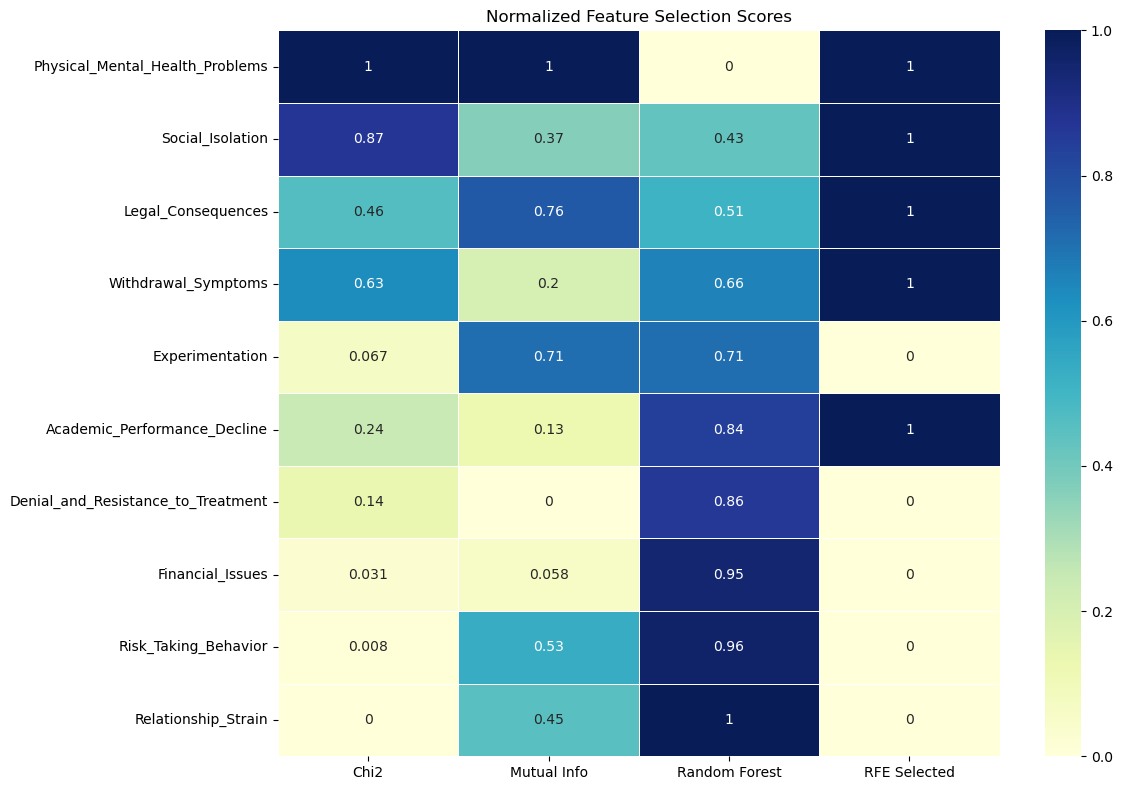

In [27]:
# Plot heatmap
normalized_scores.sort_values("Random Forest", ascending=True, inplace=True)
plt.figure(figsize=(12, 8))
sns.heatmap(normalized_scores, annot=True, cmap="YlGnBu", cbar=True, linewidths=.5)
plt.title("Normalized Feature Selection Scores")
plt.tight_layout()
plt.savefig("feature_selection_heatmap.png", dpi=300)
plt.show()

In [29]:
# Print selected features from RFE
print("Top 5 Features Selected by RFE:")
print(rfe_selected_features.tolist())

Top 5 Features Selected by RFE:
['Academic_Performance_Decline', 'Social_Isolation', 'Physical_Mental_Health_Problems', 'Legal_Consequences', 'Withdrawal_Symptoms']


In [31]:
# Save the selected features for model training
selected_features = X[rfe_selected_features]
selected_features.to_csv("selected_features.csv", index=False)